In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
#we will load the iris data from scikit - learn package
from sklearn . datasets import load_iris
iris = load_iris ()

# Exercise 3 Part 1

Writing everything in terms of $f_i(w)$

$f_i(w) = \frac{1}{n}∑(\frac{λ}{2}||w_i||^2 + L(y_i, w^Tx_i))$

# Exercise 3, Part 2

The hinge loss is given by

$L_h = max\{ 0, 1-y_iw^Tx_i\}$

The code is given below

In [ ]:
def h_loss(x_i, w, y_i):

    return max(0, 1-y_i * x_i @ w) #where x_i is 1xn and w is nx1

# Exercise 3, Part 3

In classification, we end up only checking for loss for those values of $w^Tx$ whose sign doesn't match the sign of the label $y$, where

$y = \{-1,1\}$


The function looks like so,

$f(w) = \frac{λ}{2}||w_i||^2 + \frac{1}{n}∑L_h(y_i, w^Tx_i)$

In [ ]:
def f(n,x,w,y,lam):

    #first to get the summation of loss
    sum_loss = 0
    for i in range(n):
        x_i = x[i,:]
        sum_loss = sum_loss + h_loss(x_i.reshape((1, x_i.shape[0])), w, y[i])

    f_val = (np.linalg.norm(w))**2 * 0.5 * lam + (1/n) * sum_loss

    return f_val.item()

# Exercise 3 Part 4

The gradient/sub-gradient is given by,

$g_i(w) = ∇f_i(w)$

which can be written as

$g_i(w) = λw$

when $L_h = 0$, which implies that $1-y_iw^Tx_i<0$, or that the weight has correctly classified.

Also,

$g_i(w) = λw - x_i^Ty_i$

when $L_h = 1-y_iw^Tx_i$, which implies that $1-y_iw^Tx_i>0$, or that the weight has incorrectly classified as, $y_iw^Tx_i<0$



In [ ]:
def grad(n,x_i,y_i,w,lam):

    g = np.zeros((w.shape[0],1))

    if (h_loss(x_i, w, y_i) == 0):
        g = lam * w

    else:
        g = lam*w - x_i.T * y_i

    return g

# Exercise 3 Part 5

Also including code required to test accuracy here itself

In [2]:
def predict (w,x):
    return np.sign(x@w) #x is 1xn and w is nx1


def compute_accuracy(data, labels, model_w):
    #we iteratively count the number of correctly defined according to our train_data

    acc_count = 0

    for i in range(data.shape[0]):

        data_i = data[i,:]

        if(labels[i] == predict(model_w, data_i.reshape(1, data_i.shape[0]))):
          acc_count = acc_count + 1

    #to return accuracy in %

    return acc_count/(data.shape[0]) * 100

In [ ]:
def OPT1(data_train, data_test, label_train , label_test, lamb , num_epochs ):

  t = 1

  y = label_train

  # initialize w
  w = np.zeros((data_train.shape[1],1))
  arr = np. arange ( data_train . shape [0])

  #implementing lists to plot graphs
  Ep = [] #epochs
  f_val = []
  train_accu = []
  test_accu = []

  for epoch in range ( num_epochs ):
    np. random . shuffle (arr ) # shuffle every epoch
    Ep.append(epoch)

    for i in np. nditer (arr): # Pass through the data points
      step = 1/t

      data_i = data_train[i,:]
      w = w - step * grad(data_train.shape[0], data_i.reshape((1, data_i.shape[0])) , y[i], w, lamb)
      print(w)

      t = t+1
      if t >10^-4:
        t = 1

    #adding to our lists
    f_val.append(f(data_train.shape[0],data_train,w,y,lamb))
    train_accu.append(compute_accuracy(data_train, label_train, w))
    test_accu.append(compute_accuracy(data_test, label_test, w))

  return w, Ep, f_val, train_accu, test_accu

# Exercise 3 Part 6

First, we import all the data from our dataset, as done in exercise 2

In [3]:
A = iris . data

n = iris . data . shape [0] # Number of data points
d = iris . data . shape [1] # Dimension of data points

#In the following code , we create a nx1 vector of target labels
y = 1.0* np. ones ([A. shape [0] ,])

for i in range ( iris . target . shape [0]) :
    if i == 1: y[i]=1
    else: y[i] = -1

# Create an index array
indexarr = np. arange (n) # index array
np. random . shuffle ( indexarr ) # shuffle the indices

#Use the first 80% of indexarr to create the train data and the remaining
#20% to create the test data

train_data = np.take(A, indexarr[0:120], axis=0)
train_label = np.take(y, indexarr[0:120])
test_data = np.take(A, indexarr[120:150], axis = 0)
test_label = np.take(y, indexarr[120:150])

Now we carry out what is desired in Q6


# $λ = 0.001$

In [ ]:
lamb =0.001

#total epochs desired
num_epochs = 1000

w, Epoch, f_val_1, train_accu_1, test_accu_1 = OPT1 (train_data, test_data, train_label , test_label, lamb , num_epochs )


Streaming output truncated to the last 5000 lines.
[[-2.3312691 ]
 [-1.88097787]
 [-5.98180911]
 [-2.9280179 ]]
[[-2.32893783]
 [-1.8790969 ]
 [-5.9758273 ]
 [-2.92508988]]
[[-2.32660889]
 [-1.8772178 ]
 [-5.96985147]
 [-2.92216479]]
[[-2.32428228]
 [-1.87534058]
 [-5.96388162]
 [-2.91924263]]
[[-2.321958  ]
 [-1.87346524]
 [-5.95791774]
 [-2.91632339]]
[[-2.31963604]
 [-1.87159177]
 [-5.95195982]
 [-2.91340706]]
[[-2.31731641]
 [-1.86972018]
 [-5.94600786]
 [-2.91049366]]
[[ 2.58500091]
 [ 1.13214954]
 [-4.54006185]
 [-2.70758316]]
[[-1.71758409]
 [-1.86898261]
 [-5.63552179]
 [-2.80487558]]
[[-1.71586651]
 [-1.86711363]
 [-5.62988627]
 [-2.8020707 ]]
[[-1.71415064]
 [-1.86524652]
 [-5.62425638]
 [-2.79926863]]
[[-1.71243649]
 [-1.86338127]
 [-5.61863213]
 [-2.79646936]]
[[-1.71072405]
 [-1.86151789]
 [-5.6130135 ]
 [-2.7936729 ]]
[[-1.70901333]
 [-1.85965637]
 [-5.60740048]
 [-2.79087922]]
[[-1.70730432]
 [-1.85779671]
 [-5.60179308]
 [-2.78808834]]
[[-1.70559701]
 [-1.85593892]
 [-5

In [ ]:
plt.plot(Epoch, f_val_1)
plt.title("Epoch vs Func Val")

Text(0.5, 1.0, 'Epoch vs Func Val')

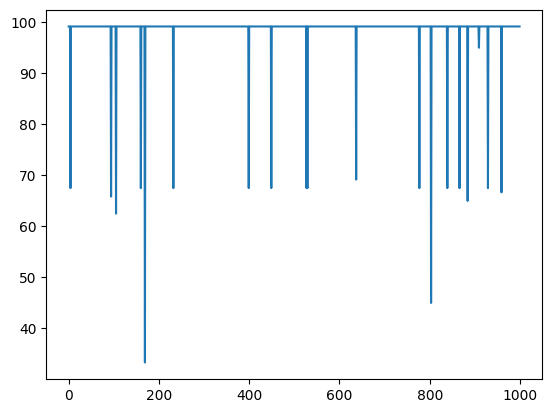

In [ ]:
plt.plot(Epoch, train_accu_1)
plt.title("Epoch vs Train Accuracy")

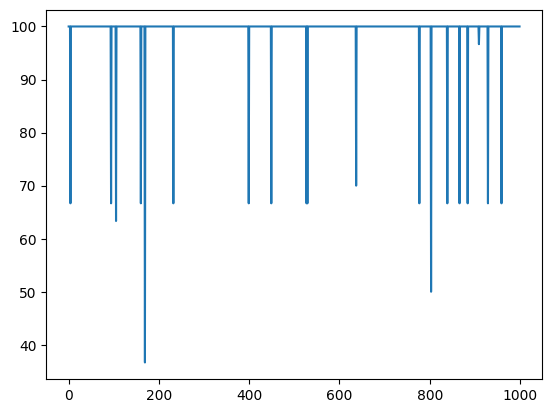

In [ ]:
plt.plot(Epoch, test_accu_1)
plt.title("Epoch vs Test Accuracy")

# $λ = 0.01$

In [ ]:
lamb =0.01

#total epochs desired
num_epochs = 1000

w, Epoch, f_val_2, train_accu_2, test_accu_2 = OPT1 (train_data, test_data, train_label , test_label, lamb , num_epochs )

Streaming output truncated to the last 5000 lines.
[[-0.09906682]
 [-0.28861684]
 [-0.06649736]
 [-0.00958157]]
[[-0.09807615]
 [-0.28573067]
 [-0.06583239]
 [-0.00948576]]
[[-0.09709539]
 [-0.28287337]
 [-0.06517406]
 [-0.0093909 ]]
[[-0.09612443]
 [-0.28004463]
 [-0.06452232]
 [-0.00929699]]
[[-0.09516319]
 [-0.27724419]
 [-0.0638771 ]
 [-0.00920402]]
[[-0.09421156]
 [-0.27447174]
 [-0.06323833]
 [-0.00911198]]
[[-0.09326944]
 [-0.27172703]
 [-0.06260594]
 [-0.00902086]]
[[-0.09233675]
 [-0.26900976]
 [-0.06197988]
 [-0.00893065]]
[[-0.09141338]
 [-0.26631966]
 [-0.06136008]
 [-0.00884135]]
[[-0.09049925]
 [-0.26365646]
 [-0.06074648]
 [-0.00875293]]
[[-0.08959425]
 [-0.2610199 ]
 [-0.06013902]
 [-0.0086654 ]]
[[-0.08869831]
 [-0.2584097 ]
 [-0.05953763]
 [-0.00857875]]
[[-0.08781133]
 [-0.2558256 ]
 [-0.05894225]
 [-0.00849296]]
[[-0.08693321]
 [-0.25326735]
 [-0.05835283]
 [-0.00840803]]
[[-0.08606388]
 [-0.25073467]
 [-0.0577693 ]
 [-0.00832395]]
[[-0.08520324]
 [-0.24822732]
 [-0

In [ ]:
plt.plot(Epoch, f_val_2)
plt.title("Epoch vs Func Val")

Text(0.5, 1.0, 'Epoch vs Func Val')

In [ ]:
plt.plot(Epoch, train_accu_2)
plt.title("Epoch vs Train Accuracy")

Text(0.5, 1.0, 'Epoch vs Train Accuracy')

Text(0.5, 1.0, 'Epoch vs Test Accuracy')

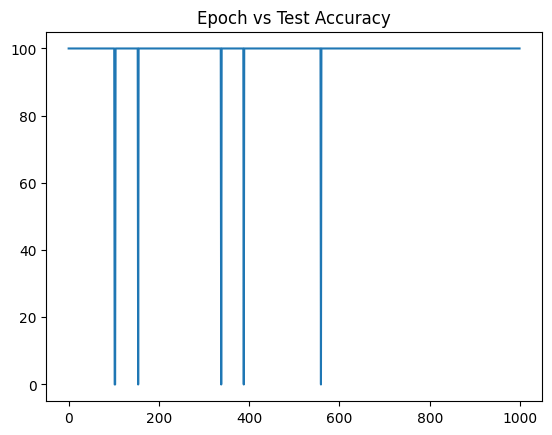

In [ ]:
plt.plot(Epoch, test_accu_2)
plt.title("Epoch vs Test Accuracy")

# $λ = 0.1$

In [ ]:
lamb =0.1

#total epochs desired
num_epochs = 1000

w, Epoch, f_val_3, train_accu_3, test_accu_3 = OPT1 (train_data, test_data, train_label , test_label, lamb , num_epochs )

Streaming output truncated to the last 5000 lines.
[[-0.38673573]
 [-0.28151964]
 [-0.13430615]
 [-0.01688015]]
[[-0.34806216]
 [-0.25336768]
 [-0.12087554]
 [-0.01519213]]
[[-0.31325594]
 [-0.22803091]
 [-0.10878798]
 [-0.01367292]]
[[-0.28193035]
 [-0.20522782]
 [-0.09790918]
 [-0.01230563]]
[[-0.25373731]
 [-0.18470504]
 [-0.08811827]
 [-0.01107506]]
[[-0.22836358]
 [-0.16623453]
 [-0.07930644]
 [-0.00996756]]
[[-0.20552722]
 [-0.14961108]
 [-0.07137579]
 [-0.0089708 ]]
[[-0.1849745 ]
 [-0.13464997]
 [-0.06423822]
 [-0.00807372]]
[[-0.16647705]
 [-0.12118497]
 [-0.05781439]
 [-0.00726635]]
[[-0.14982935]
 [-0.10906648]
 [-0.05203295]
 [-0.00653971]]
[[-0.13484641]
 [-0.09815983]
 [-0.04682966]
 [-0.00588574]]
[[-0.12136177]
 [-0.08834385]
 [-0.04214669]
 [-0.00529717]]
[[-0.10922559]
 [-0.07950946]
 [-0.03793202]
 [-0.00476745]]
[[-0.09830303]
 [-0.07155852]
 [-0.03413882]
 [-0.00429071]]
[[-5.08847273]
 [-3.26440266]
 [-1.23072494]
 [-0.20386164]]
[[-4.57962546]
 [-2.9379624 ]
 [-1

Text(0.5, 1.0, 'Epoch vs Func Val')

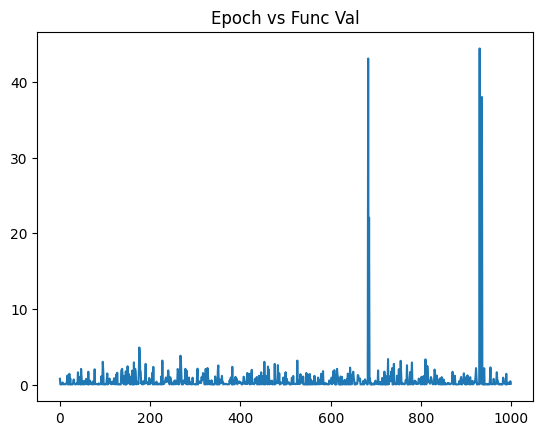

In [ ]:
plt.plot(Epoch, f_val_3)
plt.title("Epoch vs Func Val")

In [ ]:
plt.plot(Epoch, train_accu_3)
plt.title("Epoch vs Train Accuracy")

Text(0.5, 1.0, 'Epoch vs Train Accuracy')

In [ ]:
plt.plot(Epoch, test_accu_3)
plt.title("Epoch vs Test Accuracy")

Text(0.5, 1.0, 'Epoch vs Test Accuracy')

# $λ = 1$

In [ ]:
lamb =1

#total epochs desired
num_epochs = 1000

w, Epoch, f_val_4, train_accu_4, test_accu_4 = OPT1 (train_data, test_data, train_label , test_label, lamb , num_epochs )

Streaming output truncated to the last 5000 lines.
[[0.]
 [0.]
 [0.]
 [0.]]
[[4.9]
 [3. ]
 [1.4]
 [0.2]]
[[-5.4]
 [-3.4]
 [-1.7]
 [-0.2]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-6.1]
 [-2.8]
 [-4. ]
 [-1.3]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-6.3]
 [-2.3]
 [-4.4]
 [-1.3]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-6.8]
 [-2.8]
 [-4.8]
 [-1.4]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-5.8]
 [-2.7]
 [-5.1]
 [-1.9]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-5. ]
 [-3.2]
 [-1.2]
 [-0.2]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-7.1]
 [-3. ]
 [-5.9]
 [-2.1]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-6. ]
 [-2.7]
 [-5.1]
 [-1.6]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-5.1]
 [-2.5]
 [-3. ]
 [-1.1]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-5.6]
 [-2.7]
 [-4.2]
 [-1.3]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-5. ]
 [-2. ]
 [-3.5]
 [-1. ]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-5. ]
 [-3.4]
 [-1.6]
 [-0.4]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-4.8]
 [-3.1]
 [-1.6]
 [-0.2]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-6.4]
 [-2.8]
 [-5.6]
 [-2.2]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-6.3]
 [-2.5]
 [-4.9]
 [-1.5]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[-5.8]
 [-4. ]
 [-1.2]
 

In [ ]:
plt.plot(Epoch, f_val_4)
plt.title("Epoch vs Func Val")

Text(0.5, 1.0, 'Epoch vs Func Val')

In [ ]:
plt.plot(Epoch, train_accu_4)
plt.title("Epoch vs Train Accuracy")

Text(0.5, 1.0, 'Epoch vs Train Accuracy')

Text(0.5, 1.0, 'Epoch vs Test Accuracy')

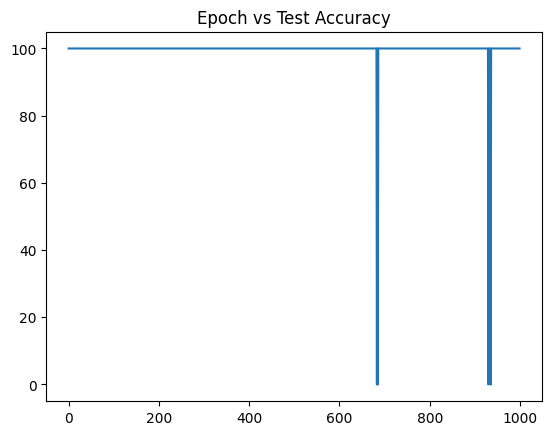

In [ ]:
plt.plot(Epoch, test_accu_3)
plt.title("Epoch vs Test Accuracy")

# $λ = 10$

In [ ]:
lamb =10

#total epochs desired
num_epochs = 1000

w, Epoch, f_val_5, train_accu_5, test_accu_5 = OPT1 (train_data, test_data, train_label , test_label, lamb , num_epochs )

[[-6.6]
 [-2.9]
 [-4.6]
 [-1.3]]
[[59.4]
 [26.1]
 [41.4]
 [11.7]]
[[-540.7]
 [-237.9]
 [-377.5]
 [-107.1]]
[[4866.3]
 [2141.1]
 [3397.5]
 [ 963.9]]
[[-43801.5]
 [-19272.9]
 [-30578.9]
 [ -8675.4]]
[[394213.5]
 [173456.1]
 [275210.1]
 [ 78078.6]]
[[-3547926.5]
 [-1561108.4]
 [-2476892.5]
 [ -702708. ]]
[[31931338.5]
 [14049975.6]
 [22292032.5]
 [ 6324372. ]]
[[-2.87382051e+08]
 [-1.26449784e+08]
 [-2.00628294e+08]
 [-5.69193482e+07]]
[[2.58643846e+09]
 [1.13804805e+09]
 [1.80565465e+09]
 [5.12274134e+08]]
[[-2.32779461e+10]
 [-1.02424325e+10]
 [-1.62508918e+10]
 [-4.61046721e+09]]
[[2.09501515e+11]
 [9.21818923e+10]
 [1.46258026e+11]
 [4.14942049e+10]]
[[-1.88551364e+12]
 [-8.29637030e+11]
 [-1.31632224e+12]
 [-3.73447844e+11]]
[[1.69696227e+13]
 [7.46673327e+12]
 [1.18469001e+13]
 [3.36103059e+12]]
[[-1.52726605e+14]
 [-6.72005995e+13]
 [-1.06622101e+14]
 [-3.02492753e+13]]
[[1.37453944e+15]
 [6.04805395e+14]
 [9.59598911e+14]
 [2.72243478e+14]]
[[-1.23708550e+16]
 [-5.44324856e+15]
 [

<ipython-input-21-7cbfcd34630e>:3: RuntimeWarning: overflow encountered in matmul
  return max(0, 1-y_i * x_i @ w) #where x_i is 1xn and w is nx1
<ipython-input-23-3eb800c037de>:6: RuntimeWarning: overflow encountered in multiply
  g = lam * w
<ipython-input-25-5d99bc237e1d>:25: RuntimeWarning: invalid value encountered in subtract
  w = w - step * grad(data_train.shape[0], data_i.reshape((1, data_i.shape[0])) , y[i], w, lamb)


Streaming output truncated to the last 5000 lines.
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]]
[[nan]
 [nan]
 [nan]


Text(0.5, 1.0, 'Epoch vs Func Val')

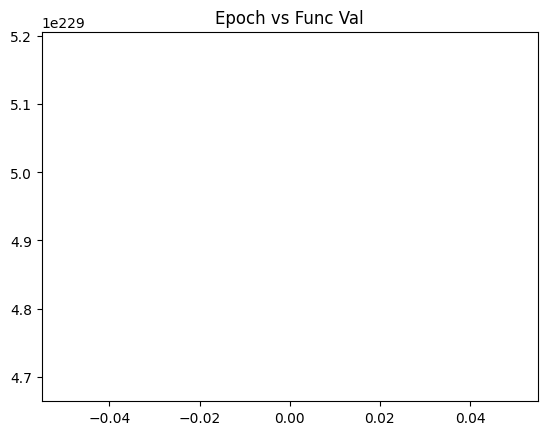

In [ ]:
plt.plot(Epoch, f_val_5)
plt.title("Epoch vs Func Val")

It appears that over here, the value of $λw$ is rising greatly, hence not allowing for an effect of $y_ix_i$ to decrease it overall.

For this case, due to the large value of $λ$, we end up diverging from our final soln.

# Observations

Firstly, I avoided plotting everything on the same graphs since the shapes show random fluctation, and no plots would be visible properly

Secondly, for all values of $λ$, we get near 100% accuracy at the end except 1 and 10

# Exercise 3 Part 7

Using, $λ = 0.01$ as it has the best accuracy and the least functional value and reaches high accuracy quicker

We introduce a variable called patience p.

We set a value for p, say 100.

If the value of test and train accuracy are greater than 90% (say), we decrease value of p by 1 for every iteration.

Essentially, we say that if accuracy is greater than 90% for 100 consecutive iterations, then we have reached a minimiser for w

In [ ]:
def OPT2(data_train, data_test, label_train , label_test, lamb, num_epochs):

  t = 1
  p=100 #patience value

  y = label_train

  # initialize w
  w = np.zeros((data_train.shape[1],1))
  arr = np. arange ( data_train . shape [0])

  #implementing lists to plot graphs
  I = [] #iterations
  f_val = []
  train_accu = []
  test_accu = []

  for epoch in range ( num_epochs ):
    np. random . shuffle (arr ) # shuffle every epoch
    I.append(epoch)

    for i in np. nditer (arr): # Pass through the data points
      step = 1/t

      data_i = data_train[i,:]
      w = w - step * grad(data_train.shape[0], data_i.reshape((1, data_i.shape[0])) , y[i], w, lamb)
      print(w)

      t = t+1
      if t >10^-4:
        t = 1

    if(compute_accuracy(data_train, label_train, w)>90 and compute_accuracy(data_test, label_test, w)>90):
        p = p-1
    else:
        p = 100

    #adding to our lists
    f_val.append(f(data_train.shape[0],data_train,w,y,lamb))
    train_accu.append(compute_accuracy(data_train, label_train, w))
    test_accu.append(compute_accuracy(data_test, label_test, w))

    if(p == 0):
      break

  return w, I, f_val, train_accu, test_accu

In [ ]:
lamb =0.01

#total epochs desired
num_epochs = 1000

w, Epoch, f_val, train_accu, test_accu = OPT2 (train_data, test_data, train_label , test_label, lamb , num_epochs )

Streaming output truncated to the last 5000 lines.
[[-0.1015381 ]
 [-0.1856279 ]
 [-0.14494924]
 [-0.07929777]]
[[-0.10052272]
 [-0.18377162]
 [-0.14349975]
 [-0.0785048 ]]
[[-0.09951749]
 [-0.1819339 ]
 [-0.14206475]
 [-0.07771975]]
[[-0.09852232]
 [-0.18011457]
 [-0.1406441 ]
 [-0.07694255]]
[[-0.09753709]
 [-0.17831342]
 [-0.13923766]
 [-0.07617313]]
[[-0.09656172]
 [-0.17653029]
 [-0.13784529]
 [-0.07541139]]
[[-0.09559611]
 [-0.17476498]
 [-0.13646683]
 [-0.07465728]]
[[-0.09464015]
 [-0.17301733]
 [-0.13510216]
 [-0.07391071]]
[[-0.09369374]
 [-0.17128716]
 [-0.13375114]
 [-0.0731716 ]]
[[-0.09275681]
 [-0.16957429]
 [-0.13241363]
 [-0.07243988]]
[[4.80817076]
 [2.83212146]
 [1.2689105 ]
 [0.12828451]]
[[-0.33991095]
 [-0.49619976]
 [-0.4437786 ]
 [-0.37299833]]
[[-0.33651184]
 [-0.49123776]
 [-0.43934081]
 [-0.36926835]]
[[-0.33314672]
 [-0.48632538]
 [-0.43494741]
 [-0.36557566]]
[[-0.32981525]
 [-0.48146213]
 [-0.43059793]
 [-0.36191991]]
[[-0.3265171 ]
 [-0.47664751]
 [-0.426

In [ ]:
plt.plot(Epoch, f_val)
plt.title("Epoch vs Func Val")

Text(0.5, 1.0, 'Epoch vs Func Val')

Text(0.5, 1.0, 'Epoch vs Train Accuracy')

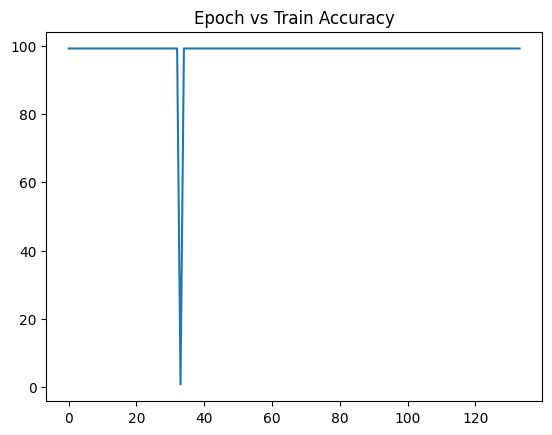

In [ ]:
plt.plot(Epoch, train_accu)
plt.title("Epoch vs Train Accuracy")

Text(0.5, 1.0, 'Epoch vs Test Accuracy')

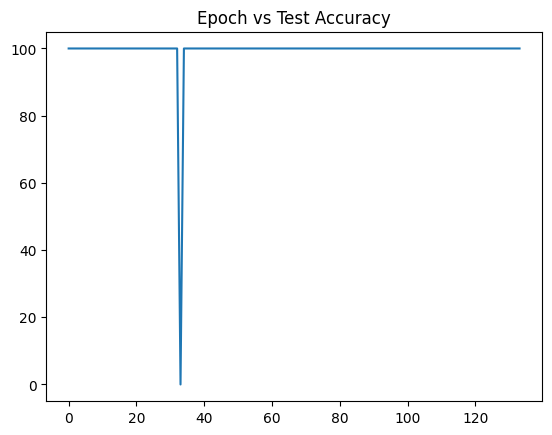

In [ ]:
plt.plot(Epoch, test_accu)
plt.title("Epoch vs Test Accuracy")

Clearly, because of the higher accuracy, we end up finishing faster with lesser epochs.

# Exercise 3 Part 8,

we define the loss, gradient and functional value for the two other loss parameters

# For Logistic Loss

In [ ]:
def l_loss(x_i, w, y_i):

    return np.log(1 + m.exp(-y_i * x_i @ w))

In [ ]:
def l_f(n,x,w,y,lam):

    #first to get the summation of loss
    sum_loss = 0
    for i in range(n):
        x_i = x[i,:]
        sum_loss = sum_loss + l_loss(x_i.reshape((1, x_i.shape[0])), w, y[i])

    f_val = (np.linalg.norm(w))**2 * 0.5 * lam + (1/n) * sum_loss

    return f_val.item()

In [ ]:
def l_grad(n,x_i,y_i,w,lam):

    g = np.zeros((w.shape[0],1))

    g = lam*w - x_i.T * y_i * m.exp(-y_i * x_i @ w)/(1+m.exp(-y_i * x_i @ w))

    return g

Now to implement the code

In [ ]:
def OPT3(data_train, data_test, label_train , label_test, lamb, num_epochs):

  t = 1
  p=100 #patience value

  y = label_train

  # initialize w
  w = np.zeros((data_train.shape[1],1))
  arr = np. arange ( data_train . shape [0])

  #implementing lists to plot graphs
  I = [] #iterations
  f_val = []
  train_accu = []
  test_accu = []

  for epoch in range ( num_epochs ):
    np. random . shuffle (arr ) # shuffle every epoch
    I.append(epoch)

    for i in np. nditer (arr): # Pass through the data points
      step = 1/t

      data_i = data_train[i,:]
      w = w - step * l_grad(data_train.shape[0], data_i.reshape((1, data_i.shape[0])) , y[i], w, lamb)
      print(w)

      t = t+1
      if t >10^-4:
        t = 1

    if(compute_accuracy(data_train, label_train, w)>90 and compute_accuracy(data_test, label_test, w)>90):
        p = p-1
    else:
        p = 100

    #adding to our lists
    f_val.append(l_f(data_train.shape[0],data_train,w,y,lamb))
    train_accu.append(compute_accuracy(data_train, label_train, w))
    test_accu.append(compute_accuracy(data_test, label_test, w))

    if(p == 0):
      break

  return w, I, f_val, train_accu, test_accu

In [ ]:
lamb =0.01

#total epochs desired
num_epochs = 1000

w, Epoch, f_val, train_accu, test_accu = OPT3(train_data, test_data, train_label , test_label, lamb , num_epochs )

<ipython-input-7-539f67527fb5>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  g = lam*w - x_i.T * y_i * m.exp(-y_i * x_i @ w)/(1+m.exp(-y_i * x_i @ w))
<ipython-input-5-d12a5fb4e368>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return np.log(1 + m.exp(-y_i * x_i @ w))


Streaming output truncated to the last 5000 lines.
[[-0.92289378]
 [ 0.25342826]
 [-2.79285287]
 [-1.26237739]]
[[-0.91366512]
 [ 0.25089385]
 [-2.76492454]
 [-1.24975367]]
[[-0.90688501]
 [ 0.24673533]
 [-2.737888  ]
 [-1.23739753]]
[[-0.89781617]
 [ 0.24426797]
 [-2.71050912]
 [-1.22502355]]
[[-0.89168192]
 [ 0.23984692]
 [-2.68426957]
 [-1.21289696]]
[[-0.8827651 ]
 [ 0.23744845]
 [-2.65742688]
 [-1.200768  ]]
[[-0.87635406]
 [ 0.23344539]
 [-2.63164063]
 [-1.18886539]]
[[-0.86853588]
 [ 0.2305157 ]
 [-2.60562184]
 [-1.17701175]]
[[-0.86234183]
 [ 0.22650083]
 [-2.58024951]
 [-1.16538818]]
[[-0.85586779]
 [ 0.22277241]
 [-2.55517872]
 [-1.15382576]]
[[-0.84730913]
 [ 0.22054468]
 [-2.52962695]
 [-1.14228751]]
[[-0.83883663]
 [ 0.21833896]
 [-2.50433106]
 [-1.13086476]]
[[-0.83044827]
 [ 0.21615557]
 [-2.47928776]
 [-1.11955611]]
[[-0.82214689]
 [ 0.2139924 ]
 [-2.45449688]
 [-1.10836127]]
[[-0.81392542]
 [ 0.21185248]
 [-2.42995191]
 [-1.09727766]]
[[-0.8057862 ]
 [ 0.20973394]
 [-2

Text(0.5, 1.0, 'Epoch vs Func Val')

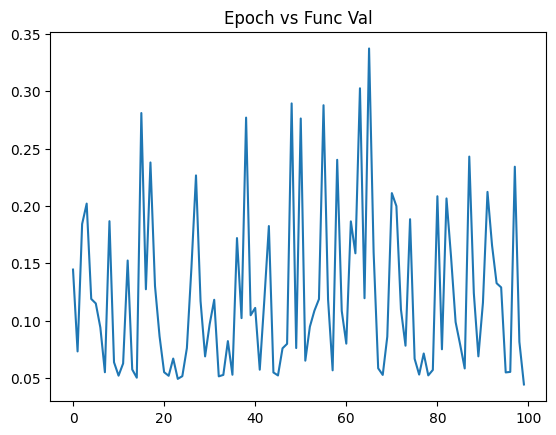

In [ ]:
plt.plot(Epoch, f_val)
plt.title("Epoch vs Func Val")

Text(0.5, 1.0, 'Epoch vs Train Accuracy')

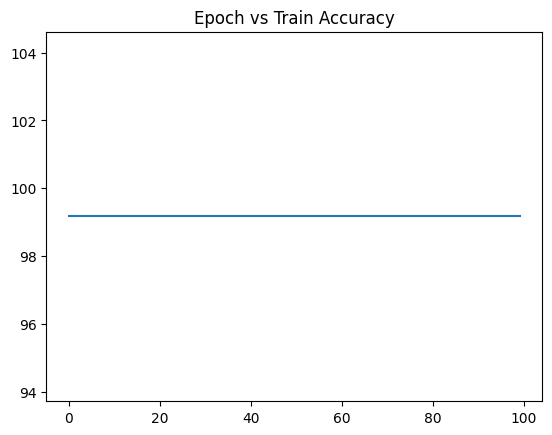

In [ ]:
plt.plot(Epoch, train_accu)
plt.title("Epoch vs Train Accuracy")

Text(0.5, 1.0, 'Epoch vs Test Accuracy')

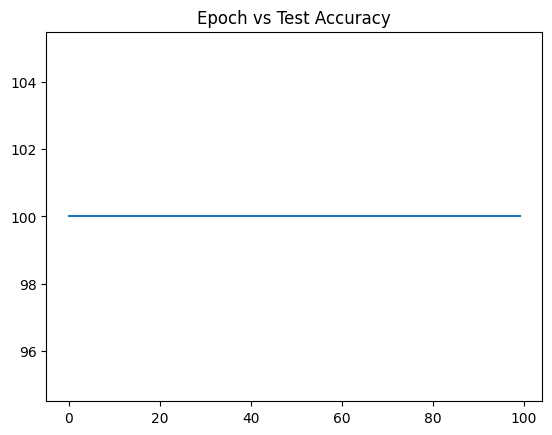

In [ ]:
plt.plot(Epoch, test_accu)
plt.title("Epoch vs Test Accuracy")

Logistic Function works surprisingly well.

There is heavy fluctuation in functional value, but it is rather small in terms of magnitude.

The accuracy is much higher compared to hinge loss

# Square Hinge

In [4]:
def sq_loss(x_i, w, y_i):

    return (max(0, 1-y_i * x_i @ w))**2

In [5]:
def sq_f(n,x,w,y,lam):

    #first to get the summation of loss
    sum_loss = 0
    for i in range(n):
        x_i = x[i,:]
        sum_loss = sum_loss + sq_loss(x_i.reshape((1, x_i.shape[0])), w, y[i])

    f_val = (np.linalg.norm(w))**2 * 0.5 * lam + (1/n) * sum_loss

    return f_val.item()

In [20]:
def sq_grad(n,x_i,y_i,w,lam):

    g = np.zeros((w.shape[0],1))

    if (sq_loss(x_i, w, y_i) == 0):
        g = lam * w

    else:
        z = y_i*x_i@w
        g = lam*w - x_i.T * y_i * 2*(1-z)

    return g

Now the code

In [23]:
def OPT4(data_train, data_test, label_train , label_test, lamb, num_epochs):

  t = 1
  p=100 #patience value

  y = label_train

  # initialize w
  w = np.zeros((data_train.shape[1],1))
  arr = np. arange ( data_train . shape [0])

  #implementing lists to plot graphs
  I = [] #iterations
  f_val = []
  train_accu = []
  test_accu = []

  for epoch in range ( num_epochs ):
    np. random . shuffle (arr ) # shuffle every epoch
    I.append(epoch)

    for i in np. nditer (arr): # Pass through the data points
      step = 1/t

      data_i = data_train[i,:]
      w = w - step * sq_grad(data_train.shape[0], data_i.reshape((1, data_i.shape[0])) , y[i], w, lamb)
      print(w)

      t = t+1
      if t >10^-4:
        t = 1

    if(compute_accuracy(data_train, label_train, w)>90 and compute_accuracy(data_test, label_test, w)>90):
        p = p-1
    else:
        p = 100

    #adding to our lists
    f_val.append(sq_f(data_train.shape[0],data_train,w,y,lamb))
    train_accu.append(compute_accuracy(data_train, label_train, w))
    test_accu.append(compute_accuracy(data_test, label_test, w))

    if(p == 0):
      break

  return w, I, f_val, train_accu, test_accu

Here I changed the value for $λ$ to $0.1$ since other values of lambda were leading to values of $w$ tending to infinity or values that would simply oscillate and never reach a true minimised value.

$λ = 0.01$ - the values reached inifinity

$λ = 1$ - the values were oscillating

In [29]:
lamb =0.1

#total epochs desired
num_epochs = 1000

w, Epoch, f_val, train_accu, test_accu = OPT4(train_data, test_data, train_label , test_label, lamb , num_epochs )

Streaming output truncated to the last 5000 lines.
[[-0.95641607]
 [-0.63723126]
 [-0.26403685]
 [-0.04151403]]
[[-0.86077446]
 [-0.57350813]
 [-0.23763317]
 [-0.03736263]]
[[-0.77469702]
 [-0.51615732]
 [-0.21386985]
 [-0.03362637]]
[[-0.69722732]
 [-0.46454159]
 [-0.19248287]
 [-0.03026373]]
[[-0.62750458]
 [-0.41808743]
 [-0.17323458]
 [-0.02723736]]
[[-0.56475413]
 [-0.37627869]
 [-0.15591112]
 [-0.02451362]]
[[-0.50827871]
 [-0.33865082]
 [-0.14032001]
 [-0.02206226]]
[[-0.45745084]
 [-0.30478574]
 [-0.12628801]
 [-0.01985603]]
[[-0.41170576]
 [-0.27430716]
 [-0.11365921]
 [-0.01787043]]
[[-0.37053518]
 [-0.24687645]
 [-0.10229329]
 [-0.01608339]]
[[-0.33348166]
 [-0.2221888 ]
 [-0.09206396]
 [-0.01447505]]
[[-0.3001335 ]
 [-0.19996992]
 [-0.08285756]
 [-0.01302754]]
[[-0.27012015]
 [-0.17997293]
 [-0.07457181]
 [-0.01172479]]
[[-0.24310813]
 [-0.16197564]
 [-0.06711463]
 [-0.01055231]]
[[-0.21879732]
 [-0.14577807]
 [-0.06040316]
 [-0.00949708]]
[[-0.19691759]
 [-0.13120027]
 [-0

Text(0.5, 1.0, 'Epoch vs Func Val')

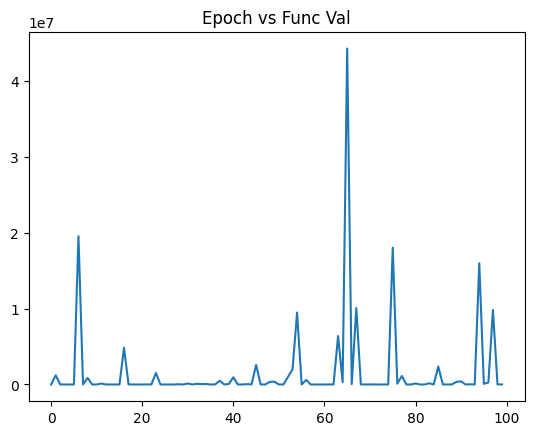

In [30]:
plt.plot(Epoch, f_val)
plt.title("Epoch vs Func Val")

In [33]:
#final functional value

print(f_val[99])

4.874434288867263


Text(0.5, 1.0, 'Epoch vs Train Accuracy')

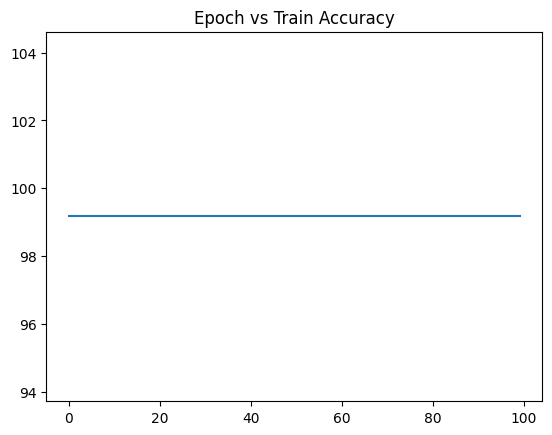

In [31]:
plt.plot(Epoch, train_accu)
plt.title("Epoch vs Train Accuracy")

Text(0.5, 1.0, 'Epoch vs Test Accuracy')

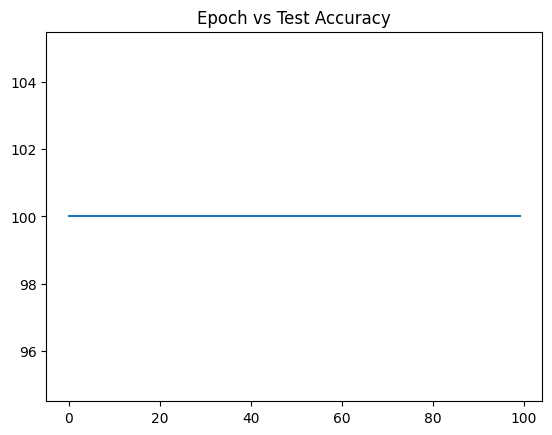

In [32]:
plt.plot(Epoch, test_accu)
plt.title("Epoch vs Test Accuracy")

Using square hinge loss, we notice how there is a heavy penalisation on the functional value due to the squaring of the hinge loss.

The functional value here is very high compared to normal hinge loss.